In [48]:
import numpy as np
import pandas as pd
import glob
import seaborn.apionly as sns
import matplotlib.pyplot as plt

In [10]:
df_dropout = pd.read_csv("rs_session243_au570_1.1.csv")
df_dropout

,Sl. No.,Level of Education - State,Primary - 2012-2013,Primary - 2014-2015,Primary - 2014-2015.1,Upper Primary - 2012-2013,Upper Primary - 2013-2014,Upper Primary - 2014-2015,Secondary - 2012-2013,Secondary - 2013-2014,Secondary - 2014-2015,Senior Secondary - 2012-2013,Senior Secondary - 2013-2014,Senior Secondary - 2014-2015
0,1,A & N Islands,0.68,1.21,0.51,1.23,0.51,1.69,5.56,7.20,9.870,14.14,15.87,16.93
1,2,Andhra Pradesh,3.18,4.35,6.72,3.36,3.78,5.20,12.72,12.65,15.710,0.35,11.79,NaN
2,3,Arunachal Pradesh,15.16,10.89,10.82,7.47,5.59,6.71,12.93,14.49,17.110,5.11,17.07,18.42
3,4,Assam,6.24,7.44,15.36,7.20,7.05,10.51,26.77,30.43,27.060,4.69,7.24,NaN
4,5,Bihar,NaN,2.09,NaN,NaN,2.98,4.08,30.14,25.33,25.900,NaN,NaN,NaN
5,6,Chandigarh,NaN,NaN,NaN,0.10,1.08,0.44,NaN,NaN,NaN,13.65,11.28,10.55
6,7,Chhatisgarh,4.14,1.42,2.91,5.42,3.80,5.85,14.86,23.41,21.260,NaN,NaN,2.76
7,8,Dadra & Nagar Haveli,NaN,1.57,1.47,3.38,4.13,4.02,24.41,28.59,16.770,9.65,6.24,9.47
8,9,Daman & Diu,NaN,0.85,1.11,NaN,3.58,3.11,11.52,19.86,32.270,1.26,9.86,40.48
9,10,Delhi,NaN,NaN,NaN,NaN,2.78,0.76,5.32,8.90,11.810,14.47,16.25,17.32


In [16]:
df_dropout = df_dropout[(df_dropout['Level of Education - State'] != 'Delhi') & (df_dropout['Level of Education - State'] != 'Puducherry') & (df_dropout['Level of Education - State'] != 'Chandigarh') & (df_dropout['Level of Education - State'] != 'A & N Islands') & (df_dropout['Level of Education - State'] != 'Dadra & Nagar Haveli') & (df_dropout['Level of Education - State'] != 'Daman & Diu') & (df_dropout['Level of Education - State'] != 'Jammu and Kashmir') & (df_dropout['Level of Education - State'] != 'Lakshadweep')]
df_dropout = df_dropout.reset_index(drop=True)
df_dropout = df_dropout[['Level of Education - State', 'Primary - 2014-2015', 'Upper Primary - 2014-2015', 'Secondary - 2014-2015']]
df_dropout = df_dropout[(df_dropout['Level of Education - State'] != 'All India')]
df_dropout = df_dropout[(df_dropout['Level of Education - State'] != 'West Bengal')] #since data for state gdp isnt available
df_dropout

,Level of Education - State,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
0,Andhra Pradesh,4.35,5.20,15.71
1,Arunachal Pradesh,10.89,6.71,17.11
2,Assam,7.44,10.51,27.06
3,Bihar,2.09,4.08,25.90
4,Chhatisgarh,1.42,5.85,21.26
5,Goa,0.20,0.07,11.15
6,Gujarat,0.76,6.41,25.04
7,Haryana,0.41,5.81,15.89
8,Himachal Pradesh,0.46,0.87,6.07
9,Jharkhand,6.41,8.99,24.00


In [51]:
path = r'C:\Users\Abhishek\Desktop\GDP1b'
all_files = glob.glob(path+'/*.csv')
li = []
for file in all_files:
    df = pd.read_csv(file,encoding = 'ISO-8859-1')
    df = df[['Item', '2014-15']]
    df = df.T
    df.columns = df.iloc[0]
    df = df[1:]
    df['State'] = file.split('\\')[-1].split('-')[1].replace('_', ' ')
    li.append(df)
df = pd.concat(li, axis = 0, ignore_index=True, sort=True)
df_GDP = df[(df['State'] != 'Delhi') & (df['State'] != 'Puducherry') & (df['State'] != 'Chandigarh')]
df_GDP_overall = df_GDP.reset_index(drop=True)

In [52]:
df_GDP = df_GDP_overall[['Per Capita GSDP (Rs.)','State']]
df_GDP = df_GDP.sort_values(by=['State'])
df_GDP

,Per Capita GSDP (Rs.),State
0,104977,Andhra Pradesh
1,112718,Arunachal Pradesh
2,60621,Assam
3,33954,Bihar
4,86860,Chhattisgarh
5,271793,Goa
6,141263,Gujarat
7,164077,Haryana
8,147330,Himachal Pradesh
9,62091,Jharkhand


In [68]:
df = df_dropout.merge(df_GDP, left_on='Level of Education - State', right_on='State')
df = df.drop(['Level of Education - State'], axis=1)
df

,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,Per Capita GSDP (Rs.),State
0,4.35,5.20,15.71,104977,Andhra Pradesh
1,10.89,6.71,17.11,112718,Arunachal Pradesh
2,7.44,10.51,27.06,60621,Assam
3,2.09,4.08,25.90,33954,Bihar
4,0.20,0.07,11.15,271793,Goa
5,0.76,6.41,25.04,141263,Gujarat
6,0.41,5.81,15.89,164077,Haryana
7,0.46,0.87,6.07,147330,Himachal Pradesh
8,6.41,8.99,24.00,62091,Jharkhand
9,2.32,3.85,26.18,145141,Karnataka


In [54]:
df['Primary - 2014-2015'].astype('float64').corr(df['Per Capita GSDP (Rs.)'].astype('float64'))

-0.4717997090206369

In [55]:
df['Upper Primary - 2014-2015'].astype('float64').corr(df['Per Capita GSDP (Rs.)'].astype('float64'))

-0.5243200551237119

In [56]:
df['Secondary - 2014-2015'].astype('float64').corr(df['Per Capita GSDP (Rs.)'].astype('float64'))

-0.4460807594616598

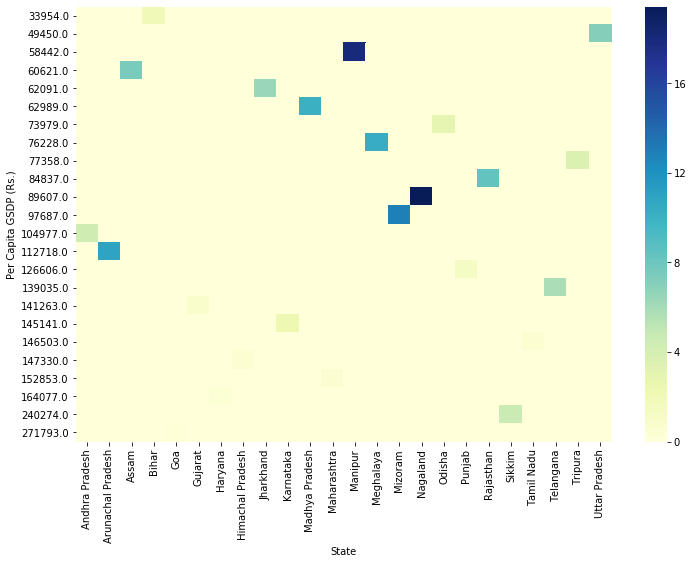

In [57]:
piv = pd.pivot_table(df, values="Primary - 2014-2015",index=["Per Capita GSDP (Rs.)"], columns=["State"], fill_value=0)
plt.figure(figsize=(12, 8))

# heatmap with a color map of choice
sns.heatmap(piv, cmap="YlGnBu")
plt.show()

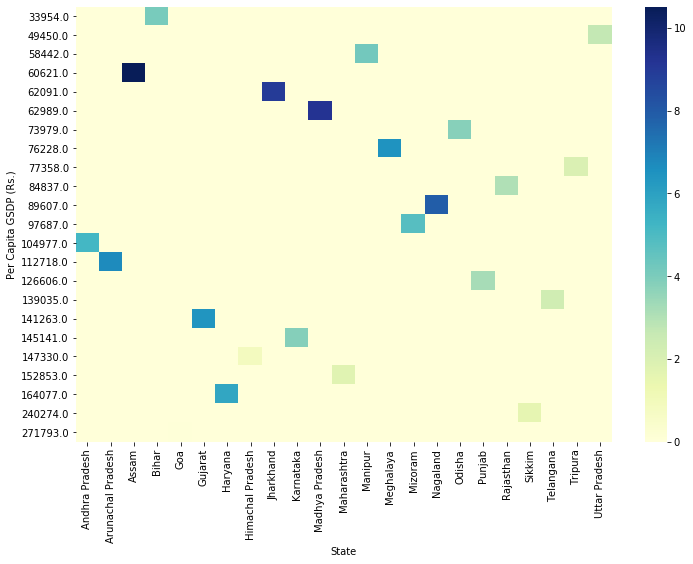

In [58]:
piv = pd.pivot_table(df, values="Upper Primary - 2014-2015",index=["Per Capita GSDP (Rs.)"], columns=["State"], fill_value=0)
plt.figure(figsize=(12, 8))

# heatmap with a color map of choice
sns.heatmap(piv, cmap="YlGnBu")
plt.show()

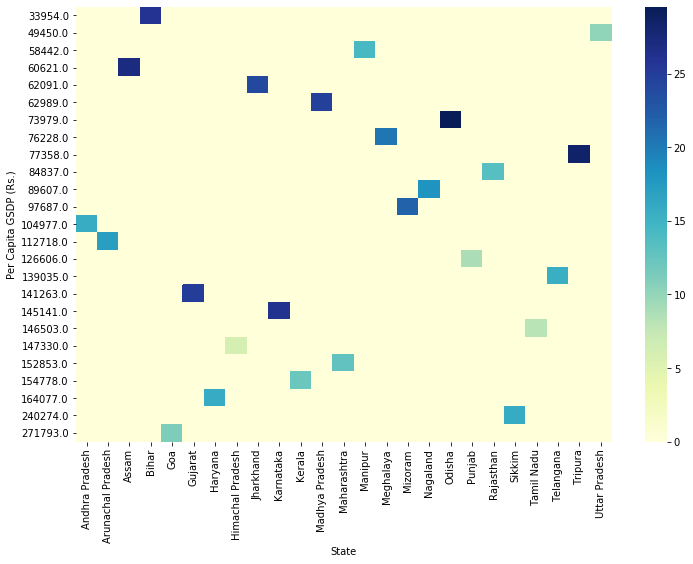

In [59]:
piv = pd.pivot_table(df, values="Secondary - 2014-2015",index=["Per Capita GSDP (Rs.)"], columns=["State"], fill_value=0)
plt.figure(figsize=(12, 8))

# heatmap with a color map of choice
sns.heatmap(piv, cmap="YlGnBu")
plt.show()

# Is there any correlation between dropout rate and %contribution of each sector (Primary, Secondary and Tertiary) to the total GDP?

In [60]:
df_GDP_overall['% contribution Primary'] = 100 * (df_GDP_overall['Primary']/df_GDP_overall['Gross State Domestic Product'])
df_GDP_overall['% contribution Secondary'] = 100 * (df_GDP_overall['Secondary']/df_GDP_overall['Gross State Domestic Product'])
df_GDP_overall['% contribution Tertiary'] = 100 * (df_GDP_overall['Tertiary']/df_GDP_overall['Gross State Domestic Product'])

In [62]:
contribution_df = df_GDP_overall[['% contribution Primary', '% contribution Secondary', '% contribution Tertiary', 'Gross State Domestic Product', 'State']]
contribution_df

,% contribution Primary,% contribution Secondary,% contribution Tertiary,Gross State Domestic Product,State
0,30.9681,19.9231,41.8505,52646842,Andhra Pradesh
1,42.7749,17.1521,37.6968,1676119,Arunachal Pradesh
2,26.8892,20.3591,46.9823,19809800,Assam
3,21.4484,16.0058,59.3174,37391988,Bihar
4,27.2396,35.0618,32.2952,23498180,Chhattisgarh
5,7.68165,38.0856,42.7784,4063307,Goa
6,17.7505,36.8967,33.7648,8.95027e+07,Gujarat
7,18.3797,28.7143,43.9503,4.37462e+07,Haryana
8,14.8355,39.4674,39.6031,10436879,Himachal Pradesh
9,24.174,28.7483,37.4623,21710718,Jharkhand


In [69]:
df_contri = df_dropout.merge(contribution_df, left_on='Level of Education - State', right_on='State')
df_contri = df_contri.drop(['Level of Education - State'], axis=1)
df_contri

,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,% contribution Primary,% contribution Secondary,% contribution Tertiary,Gross State Domestic Product,State
0,4.35,5.20,15.71,30.9681,19.9231,41.8505,52646842,Andhra Pradesh
1,10.89,6.71,17.11,42.7749,17.1521,37.6968,1676119,Arunachal Pradesh
2,7.44,10.51,27.06,26.8892,20.3591,46.9823,19809800,Assam
3,2.09,4.08,25.90,21.4484,16.0058,59.3174,37391988,Bihar
4,0.20,0.07,11.15,7.68165,38.0856,42.7784,4063307,Goa
5,0.76,6.41,25.04,17.7505,36.8967,33.7648,8.95027e+07,Gujarat
6,0.41,5.81,15.89,18.3797,28.7143,43.9503,4.37462e+07,Haryana
7,0.46,0.87,6.07,14.8355,39.4674,39.6031,10436879,Himachal Pradesh
8,6.41,8.99,24.00,24.174,28.7483,37.4623,21710718,Jharkhand
9,2.32,3.85,26.18,13.0901,22.2225,54.7747,92178806,Karnataka


In [70]:
df_contri['Primary - 2014-2015'].astype('float64').corr(df_contri['% contribution Primary'].astype('float64'))

0.4936569274124871

In [71]:
df_contri['Upper Primary - 2014-2015'].astype('float64').corr(df_contri['% contribution Primary'].astype('float64'))

0.5350193342210513

In [72]:
df_contri['Secondary - 2014-2015'].astype('float64').corr(df_contri['% contribution Primary'].astype('float64'))

0.3355413026880337

In [73]:
df_contri['Primary - 2014-2015'].astype('float64').corr(df_contri['% contribution Secondary'].astype('float64'))

-0.5200405718527035

In [74]:
df_contri['Upper Primary - 2014-2015'].astype('float64').corr(df_contri['% contribution Secondary'].astype('float64'))

-0.35744775668569645

In [75]:
df_contri['Secondary - 2014-2015'].astype('float64').corr(df_contri['% contribution Secondary'].astype('float64'))

-0.23119014199373533

In [76]:
df_contri['Primary - 2014-2015'].astype('float64').corr(df_contri['% contribution Tertiary'].astype('float64'))

0.35734674790005905

In [77]:
df_contri['Upper Primary - 2014-2015'].astype('float64').corr(df_contri['% contribution Tertiary'].astype('float64'))

-0.08883002501145384

In [78]:
df_contri['Secondary - 2014-2015'].astype('float64').corr(df_contri['% contribution Tertiary'].astype('float64'))

-0.01758225913442235

# From the above correlation it can be assumed that people who dropout are more likely to contribute to primary sector than secondary section. Also it can be seen that primary dropouts are also positively corelated with tertiary sector which is likely to be household workers and labourers.

In [80]:
df_population = df_GDP_overall[['State',"Population ('00)"]]
df_population

,State,Population ('00)
0,Andhra Pradesh,501510
1,Arunachal Pradesh,14870
2,Assam,326780
3,Bihar,1101240
4,Chhattisgarh,270530
5,Goa,14950
6,Gujarat,633590
7,Haryana,266620
8,Himachal Pradesh,70840
9,Jharkhand,349660


In [81]:
df_population = df_dropout.merge(df_population, left_on='Level of Education - State', right_on='State')
df_population = df_population.drop(['Level of Education - State'], axis=1)
df_population

,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,State,Population ('00)
0,4.35,5.20,15.71,Andhra Pradesh,501510
1,10.89,6.71,17.11,Arunachal Pradesh,14870
2,7.44,10.51,27.06,Assam,326780
3,2.09,4.08,25.90,Bihar,1101240
4,0.20,0.07,11.15,Goa,14950
5,0.76,6.41,25.04,Gujarat,633590
6,0.41,5.81,15.89,Haryana,266620
7,0.46,0.87,6.07,Himachal Pradesh,70840
8,6.41,8.99,24.00,Jharkhand,349660
9,2.32,3.85,26.18,Karnataka,635100


In [82]:
df_population['Primary - 2014-2015'].astype('float64').corr(df_population["Population ('00)"].astype('float64'))

-0.25375315890823924

In [85]:
df_population['Upper Primary - 2014-2015'].astype('float64').corr(df_population["Population ('00)"].astype('float64'))

-0.07980751903119569

In [86]:
df_population['Secondary - 2014-2015'].astype('float64').corr(df_population["Population ('00)"].astype('float64'))

-0.08398909399898821

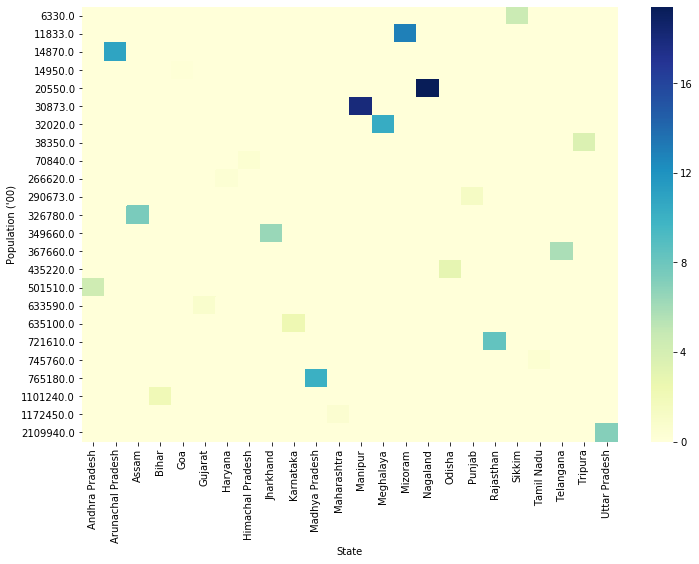

In [88]:
piv = pd.pivot_table(df_population, values="Primary - 2014-2015",index=["Population ('00)"], columns=["State"], fill_value=0)
plt.figure(figsize=(12, 8))

# heatmap with a color map of choice
sns.heatmap(piv, cmap="YlGnBu")
plt.show()

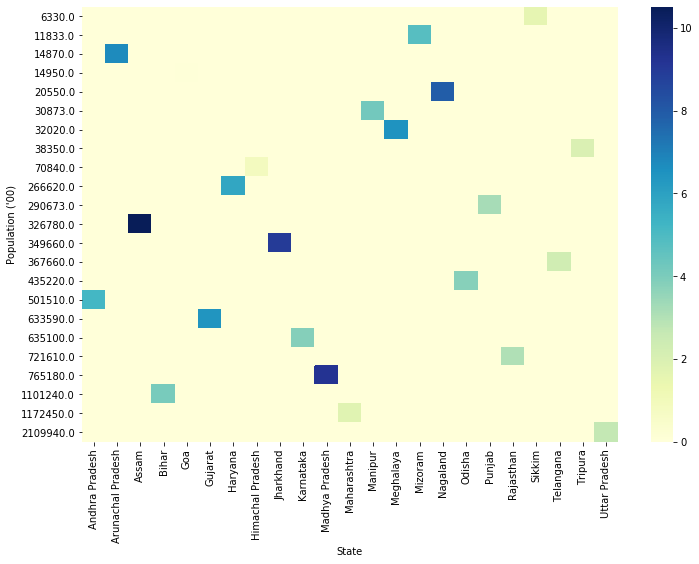

In [89]:
piv = pd.pivot_table(df_population, values="Upper Primary - 2014-2015",index=["Population ('00)"], columns=["State"], fill_value=0)
plt.figure(figsize=(12, 8))

# heatmap with a color map of choice
sns.heatmap(piv, cmap="YlGnBu")
plt.show()

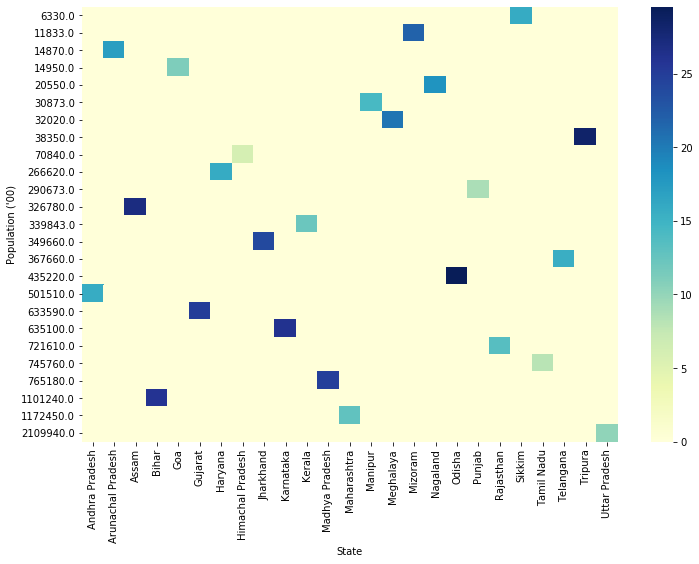

In [90]:
piv = pd.pivot_table(df_population, values="Secondary - 2014-2015",index=["Population ('00)"], columns=["State"], fill_value=0)
plt.figure(figsize=(12, 8))

# heatmap with a color map of choice
sns.heatmap(piv, cmap="YlGnBu")
plt.show()

#    You have the total population of each state from the data in part I. Is there any correlation between dropout rates and population? What is the expected trend and what is the observation?

While there is no overall correlation between population and dropouts but on plotting the heatmap some states do show high correlation between popluation and dropout rate at various levels. Strangely most of the states are in the northeast or from low gdp states like Bihar.

# Form at least one reasonable hypothesis for the observations from the data

The dropout rate and the states GDP are inversely proportional meaning if one increases the other decreases.
For states with lower GDP they need to focus more on the fact that they should try to reduce the dropout rate which in turn will help in increasing their GDP.  

From the above correlation between dropout rates and contribution to various sectors it can be assumed that people who dropout are more likely to contribute to primary sector than secondary section. Also it can be seen that primary dropouts are also positively corelated with tertiary sector which is likely to be household workers and labourers.